<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:brown;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Student's Gap Year Prediction
</p>
</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">


<div style="font-family:Georgia;background-color:'#DEB887'; padding:30px; font-size:17px">

<b>Project Objective:-</b> The aim of this project is to train a Machine Learning Model which can predict the student's gap year ( whether there will be a gap year or not) 
<br>

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color:'#DEB887';"><b> Author:- </b> Kumod Sharma</h2>
</div> 

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: purple; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> Importing Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier



from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from imblearn.over_sampling import SMOTE


<div style="border-radius:10px; border:black solid; padding: 15px; background-color: purple; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> Loading Dataset</p>

In [2]:
df = pd.read_excel("C:\\Users\\kumod sharma\\Desktop\\Student Data set 2307.xlsx")

In [3]:
df.head()

,Year of admission,Category,Gender,Year of Birth,Month of Birth,Age at the time of admission,Quota,Permanent State,X %Age,XII %Age,Parent Annual Income (F),X Pass Year,XII Pass Year,Gap Year,Program,Branch,Admission Through,Entrance test year,Course completed in stipulated time,Adm status
0,2007.0,Reg,Female,1988.0,Nov,19.0,General,Madhya Pradesh,Very good,Very good,Low,2005.0,2007.0,0.0,B.Tech,CE,Counselling,2007.0,Yes,Alumni
1,2007.0,Reg,Male,1988.0,Jun,19.0,General,Uttar Pradesh,Average,Poor,Low,2005.0,2007.0,0.0,B.Tech,CE,Direct,2007.0,Yes,Alumni
2,2007.0,RA,Male,1988.0,Dec,19.0,General,Uttar Pradesh,Poor,Average,Low,2005.0,2007.0,0.0,B.Tech,CE,Direct,2007.0,No,Adm. Withdrawn
3,2007.0,Reg,Male,1988.0,Oct,19.0,General,Uttar Pradesh,Poor,Average,Low,2005.0,2007.0,0.0,B.Tech,CE,Counselling,2007.0,Yes,Alumni
4,2007.0,Reg,Female,1988.0,Oct,19.0,General,Uttar Pradesh,Good,Good,Medium,2005.0,2007.0,0.0,B.Tech,CE,Counselling,2007.0,Yes,Alumni


---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: purple; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> Basic Understanding of Data

### 1. Cheking Dimension of Dataset.

In [4]:
df.shape

(6807, 20)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Observation:</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

* There are total **20 Attributes/columns** available in the dataset.
* There are total **6807 Records/Rows** available in the dataset.

### 2. Generating Basic Information about Data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year of admission                    6807 non-null   float64
 1   Category                             6807 non-null   object 
 2   Gender                               6807 non-null   object 
 3   Year of Birth                        6807 non-null   float64
 4   Month of Birth                       6803 non-null   object 
 5   Age at the time of admission         6807 non-null   float64
 6   Quota                                6807 non-null   object 
 7   Permanent State                      6807 non-null   object 
 8   X %Age                               6807 non-null   object 
 9   XII %Age                             6807 non-null   object 
 10  Parent Annual Income (F)             6807 non-null   object 
 11  X Pass Year                   

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Observation:</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

* We can clearly observe that out of **20 Features** we have only **7 Numerical Attributes** and **13 Categorical Columns**
* We can also observe in **Month of Birth** & **X Pass Year** Columns that they are having some missing values.

### 3. Showing Random 5 Samples from the Dataset.

In [6]:
df.sample(5)

,Year of admission,Category,Gender,Year of Birth,Month of Birth,Age at the time of admission,Quota,Permanent State,X %Age,XII %Age,Parent Annual Income (F),X Pass Year,XII Pass Year,Gap Year,Program,Branch,Admission Through,Entrance test year,Course completed in stipulated time,Adm status
915,2008.0,Reg,Male,1990.0,Aug,18.0,General,Uttar Pradesh,Good,Average,Low,2006.0,2008.0,0.0,B.Tech,EC,Direct,2008.0,Yes,Alumni
4963,2015.0,Reg,Male,1993.0,Mar,22.0,OBC,Uttar Pradesh,Poor,Poor,Low,2008.0,2010.0,5.0,M.B.A.,M.B.A.,Counselling,2015.0,Yes,Alumni
3006,2013.0,Reg,Male,1993.0,Mar,20.0,General,Uttar Pradesh,Average,Average,Medium,2007.0,2009.0,4.0,M.C.A.,M.C.A.,Counselling,2013.0,Yes,Alumni
4399,2009.0,RA,Male,1989.0,Aug,20.0,OBC,Uttar Pradesh,Good,Poor,Medium,2005.0,2007.0,2.0,B.Tech,EC,Counselling,2009.0,No,Alumni
5343,2014.0,Reg,Male,1996.0,Jun,18.0,OBC,Uttar Pradesh,Very good,Very good,Medium,2011.0,2013.0,1.0,B.Tech,ME,Counselling,2014.0,No,Adm. Withdrawn


---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: purple; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> Data Cleaning

### 1. Checking Total No. of Missing values and % of Missing values.

In [7]:
null_df = df.isnull().sum()[df.isnull().sum()>0].to_frame().rename(columns={0:"Total No. of Missing Values"})
null_df["% of Missing values"] = round(100*null_df["Total No. of Missing Values"]/len(df),2)
null_df.sort_values(by="% of Missing values",ascending=False)

,Total No. of Missing Values,% of Missing values
Month of Birth,4,0.06
X Pass Year,1,0.01


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Observation:</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

* **Month of Birth** Feature is having **Total 4 Missing values**
* **X Pass Year** Feature is having **Only 1 Missing Values**
    
**Inferenece**
* Since these two features stores critical information about the student. So it's better to drop these records.

### 2. Dropping Rows Having Missing Values.

In [8]:
df.dropna(axis=0, inplace=True)

### 3. Confirming Removal of Missing Values.

In [9]:
df.isnull().sum().sum()

0

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Observation:</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

* We can clearly observe that all the **missing records have been removed**.

### 4. Checking the Data-Types of Features.

In [10]:
df.dtypes.to_frame().rename(columns={0:"Data-Type"}).T

,Year of admission,Category,Gender,Year of Birth,Month of Birth,Age at the time of admission,Quota,Permanent State,X %Age,XII %Age,Parent Annual Income (F),X Pass Year,XII Pass Year,Gap Year,Program,Branch,Admission Through,Entrance test year,Course completed in stipulated time,Adm status
Data-Type,float64,object,object,float64,object,float64,object,object,object,object,object,float64,float64,float64,object,object,object,float64,object,object


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Observation:</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

1. We can observe that the **features which contains years values** are having **Float** Data-Type but years values are basically **whole numbers**.
2. We can observe that **Age at the time of admission** Feature is having **Float** Data-Type but age are basically **whole-numbers**.
3. We can observe that **Gap Year** Feature is having the **Flaot Data-Type**. But it stores the difference values of **X Pass Year** & **XII  Pass Year**. So it should be **whole numbers**
    
**Inference**
* So it's better to change those features Data-Type to **Integer**.

### 5. Changing the Data-Type of Years Features.

In [11]:
year_cols = ["Year of admission","Year of Birth","X Pass Year","XII Pass Year","Entrance test year"]


df[year_cols] = df[year_cols].astype(int)

### 6. Changing the Data-Type of "Age at the time of admission" Feature.

In [12]:
df["Age at the time of admission"] = df["Age at the time of admission"].astype(int)

### 7. Changing the Data-Type of "Gap Year" Feature.

In [13]:
df["Gap Year"] = df["Gap Year"].astype(int)

### 8. Fetching the Feature Names.

In [14]:
df.columns

Index(['Year of admission', 'Category', 'Gender', 'Year of Birth',
       'Month of Birth', 'Age at the time of admission', 'Quota',
       'Permanent State', 'X %Age', 'XII %Age', 'Parent Annual Income (F)',
       'X Pass Year', 'XII Pass Year', 'Gap Year', 'Program', 'Branch',
       'Admission Through', 'Entrance test year',
       'Course completed in stipulated time', 'Adm status'],
      dtype='object')

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Observation:</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

* The features **X %Age & XII %Age** shows the **score range** of the students obtained in class 10th and 12th.
* So the column Names doesn't seems appropriate. So we can upgrade these two column Names.
* We can also upgrade column name of **Adm status** to **Admission Status** for more clarilty while doing visualization.

### 9. Upgrading Column Names.

In [15]:
df.rename(columns={"X %Age":"X % Score","XII %Age":"XII % Score","Adm status":"Admission Status"},inplace=True)

---

### 10. Cleaning Our Target Variable.

In [16]:
df["Gap Year"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Observation:</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

* We can observe that there are **11 unique values** in the **Gap Year** feature.
* But **according to our requirements** we have to only predict **whether there will be a gap year or not**.
* So for that we can clean the target data as follows:-
    1. If the **Gap Year is 0** than **No** which shows that there is no gap year.
    2. If the **Gap Year is greater than 0** than **Yes** which shows that there is a gap year.

In [17]:
df["Gap Year"].replace({0:"No",1:"Yes",2:"Yes",3:"Yes",4:"Yes",5:"Yes",6:"Yes",7:"Yes",8:"Yes",9:"Yes",10:"Yes"},inplace=True)

In [18]:
df["Gap Year"].unique()

array(['No', 'Yes'], dtype=object)

---

### 11. Showing Top 5 Records.

In [19]:
df.head()

,Year of admission,Category,Gender,Year of Birth,Month of Birth,Age at the time of admission,Quota,Permanent State,X % Score,XII % Score,Parent Annual Income (F),X Pass Year,XII Pass Year,Gap Year,Program,Branch,Admission Through,Entrance test year,Course completed in stipulated time,Admission Status
0,2007,Reg,Female,1988,Nov,19,General,Madhya Pradesh,Very good,Very good,Low,2005,2007,No,B.Tech,CE,Counselling,2007,Yes,Alumni
1,2007,Reg,Male,1988,Jun,19,General,Uttar Pradesh,Average,Poor,Low,2005,2007,No,B.Tech,CE,Direct,2007,Yes,Alumni
2,2007,RA,Male,1988,Dec,19,General,Uttar Pradesh,Poor,Average,Low,2005,2007,No,B.Tech,CE,Direct,2007,No,Adm. Withdrawn
3,2007,Reg,Male,1988,Oct,19,General,Uttar Pradesh,Poor,Average,Low,2005,2007,No,B.Tech,CE,Counselling,2007,Yes,Alumni
4,2007,Reg,Female,1988,Oct,19,General,Uttar Pradesh,Good,Good,Medium,2005,2007,No,B.Tech,CE,Counselling,2007,Yes,Alumni


### 12. Showing Bottom 5 Records.

In [20]:
df.tail()

,Year of admission,Category,Gender,Year of Birth,Month of Birth,Age at the time of admission,Quota,Permanent State,X % Score,XII % Score,Parent Annual Income (F),X Pass Year,XII Pass Year,Gap Year,Program,Branch,Admission Through,Entrance test year,Course completed in stipulated time,Admission Status
6802,2010,Reg,Male,1992,Aug,18,General,Uttar Pradesh,Very good,Good,High,2008,2010,No,B.Tech,MT,Vacant Seat,2010,Yes,Alumni
6803,2010,RA,Male,1992,Nov,18,General,Uttar Pradesh,Good,Good,High,2008,2010,No,B.Tech,MT,Vacant Seat,2010,No,Alumni
6804,2010,Reg,Male,1993,Jan,17,General,Uttar Pradesh,Average,Good,Medium,2008,2010,No,B.Tech,MT,Vacant Seat,2010,Yes,Alumni
6805,2010,Reg,Male,1993,Dec,17,General,Uttar Pradesh,Very good,Very good,Low,2008,2010,No,B.Tech,MT,Counselling,2010,Yes,Alumni
6806,2010,Reg,Male,1993,Feb,17,General,Uttar Pradesh,Excellent,Very good,High,2008,2010,No,B.Tech,MT,Vacant Seat,2010,Yes,Alumni


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Observation:</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

* We can observe that **none of the features required any further cleaning**. So we can do further Analysis.

---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: purple; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> Exploratory Data Analysis.

### 1. Visualizing Class-Balance in our Target Feature.

In [21]:
z = df["Gap Year"].value_counts().to_frame()
z

,Gap Year
Yes,4604
No,2198


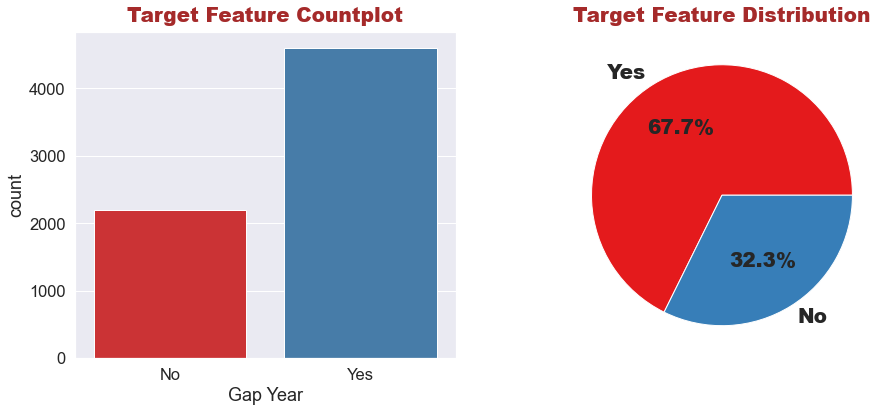

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df["Gap Year"],palette="Set1")
plt.title("Target Feature Countplot",fontweight="black",pad=10,size=20,color="Brown")

plt.subplot(1,2,2)
plt.pie(z["Gap Year"], labels = z.index , autopct="%1.1f%%",
       textprops={"fontsize":20,"fontweight":"black"},colors=sns.color_palette("Set1"))
plt.title("Target Feature Distribution",fontweight="black",pad=10,size=20,color="Brown");

plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Observation:</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

1. We can clearly observe that our target feature is having **Imbalanced-Classes**.
2. Almost **68%** of records are of **Yes Category** and only **32%** of records are of **No catgeory**.

<h3 align="left"><font color='#DEB887'>💡 Inference:</font></h3>

* Classification models tend to be **biased** towards the majority class when there is an **imbalanced distribution** of classes in the dataset.
* Imbalanced data can result in **misclassification of the minority class**, as the model may not have enough training examples to learn the patterns of the minority class accurately. 
* This can **result in lower precision, recall, and F1-score** for the minority class, leading to misrepresentation of its true performance.
* So we can use **Synthetic Minority Over-sampling Technique(SMOTE)** to address imbalanced data in our Target Feature.

---

### 2. Visualizing "Gender" Feature.

In [23]:
df["Gender"].value_counts().sort_values(ascending=False)

Male      5299
Female    1503
Name: Gender, dtype: int64

In [24]:
def countplot(cols):
    plt.figure(figsize=(15,6))
    sns.countplot(df[cols],palette="Set1",hue=df["Gap Year"],
                 order=df[cols].value_counts().sort_values(ascending=False).keys())
    plt.title(f"{cols} vs Gap Year ",fontweight="black",pad=10,size=20,color="Brown")
    plt.tight_layout()
    

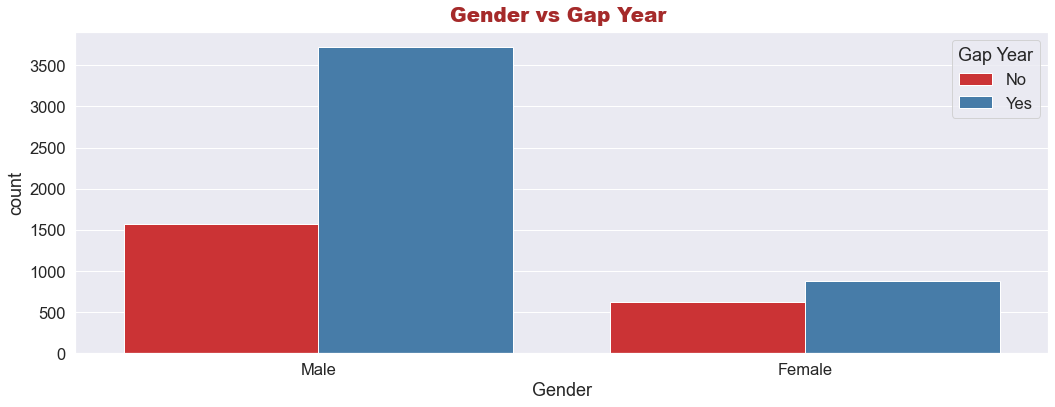

In [25]:
countplot("Gender")

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Inference</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

1. We can clearly observe that most of **students are male**.
2. Almost **60% of female students** has taken **Gap Year** and **40% has not taken any gap year**.
3. In **male students** we can say that almost **75%% male students** has taken gap year **25% male students** has not taken any gap year.
 
    
    

---

### 3. Visualizing "Category" Feature.

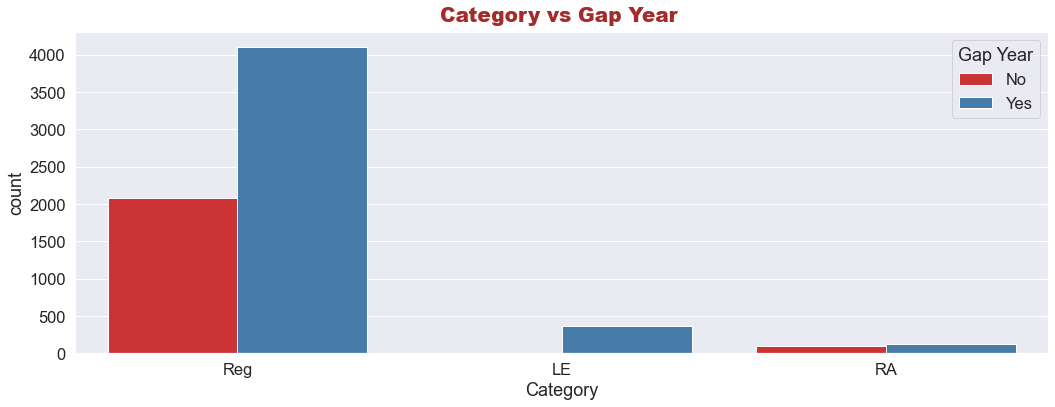

In [26]:
countplot("Category")

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Inference</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

1. We can clearly observe that **Reg Category** is **highly dominating** the other two categories.
2. In **RA Category** there are almost equal chnaces of **gap year** and not any gap year.
3. In **LE Category** almost every student has taken **Gap Year**.
4. **Note**:- Since there are high imbalance between categories we can drop this feature if required.

---

### 4. Visualizing "Quota" Feature.

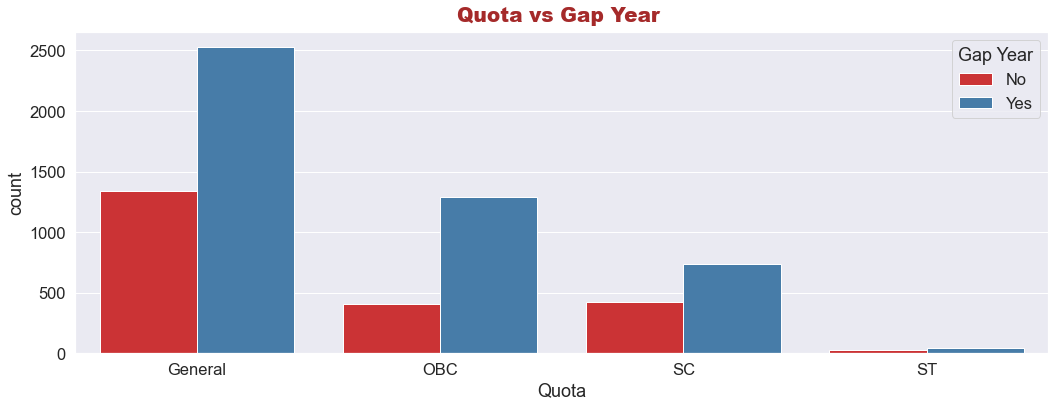

In [27]:
countplot("Quota")

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Inference</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

1. Most of the students are from **General Quota**.
2. In **ST Quota** there are very few datapoints and almost every of them has taken **gap year.**

---

### 5. Visualizing "X % Score" Feature.

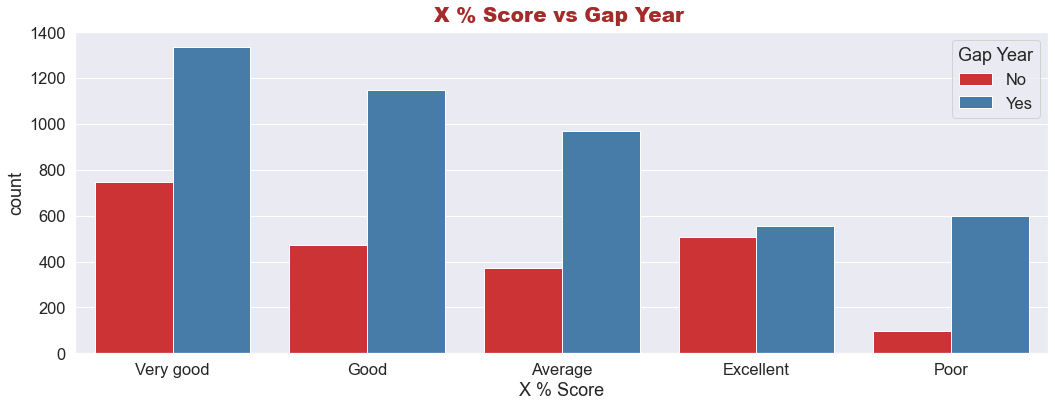

In [28]:
countplot("X % Score")

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Inference</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

1. Most of students are having **very good scores** in **class 10th**.
2. If the student is having **excellent scores in class 10th** than there is **almost equal chance of taking a gap year and not taking a gap year.**
3. We can observe that as the **class 10th scores** criteria is decreasing the chances of **gap year is increases.**

---

### 6. Visualizing "XII % Score" Feature.

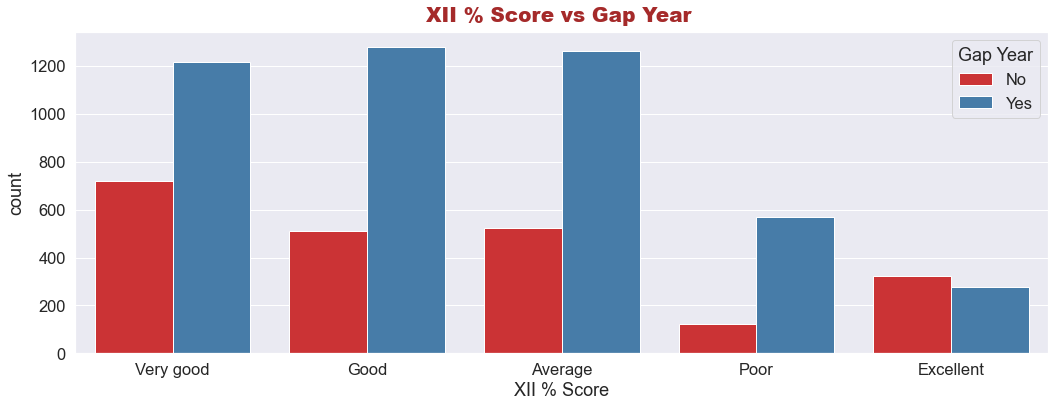

In [29]:
countplot("XII % Score")

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Inference</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

1. Most of students are having **very good scores** in **class 12th**.
2. If the student has scored **excellent marks in class 12th** than there is **low chance of taking gap year.**
3. We can observe that as the **class 12th scores** criteria is decreasing the chances of **taking gap year increases.**

---

### 7. Visualizing "Parent Annual Income(F)"  Feature.

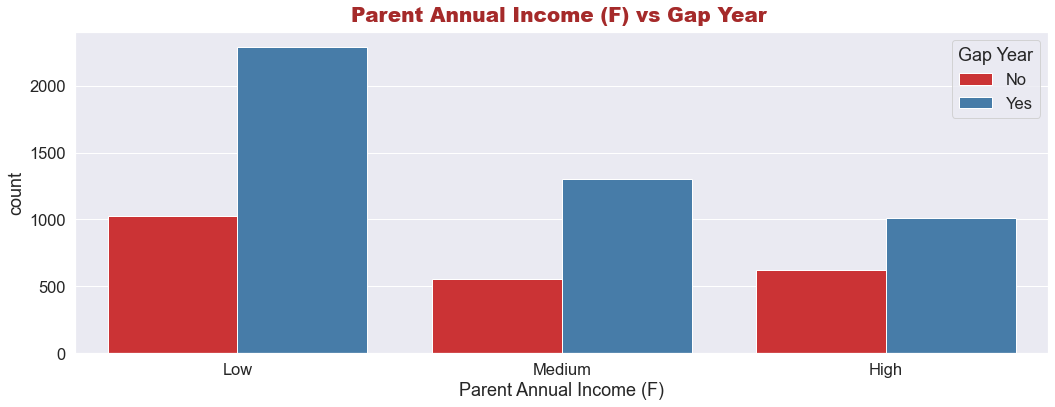

In [30]:
countplot("Parent Annual Income (F)")

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Inference</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

1. We can clearly observe that most of the students is having their **Parents Annual Income Low**.
2. There are **approxiametly equal** records for students having their parents annual income as **Medium & High.**
3. We can make an inference that students having their **parents annual income low** are actually **taking Gap Year.**

---

### 8. Visualizing "Program" Feature.

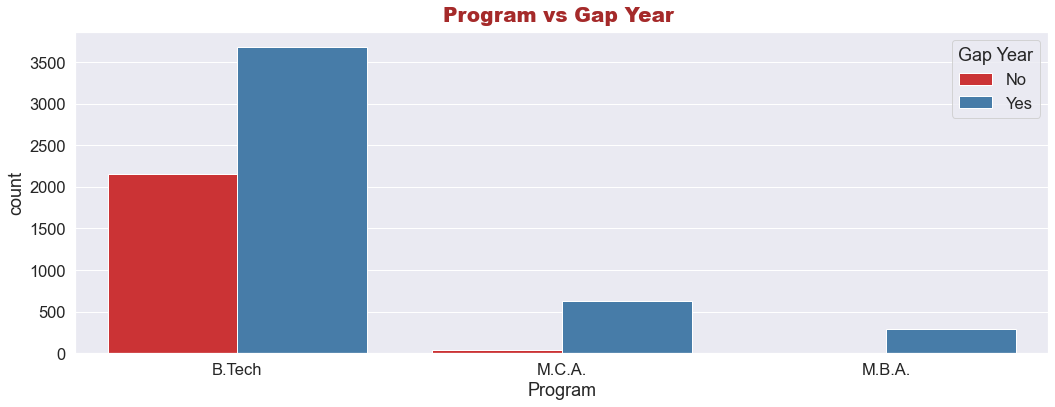

In [31]:
countplot("Program")

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Inference</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

1. Most of students are from **B.Tech Program**.
2. If the students are from either **M.C.A or M.B.A** Program then those studens will **definitely take the Gap Year**
3. Since the categories are highly imbalanced if required than we can drop this feature.

---

### 9. Visualizing "Branch" Feature.

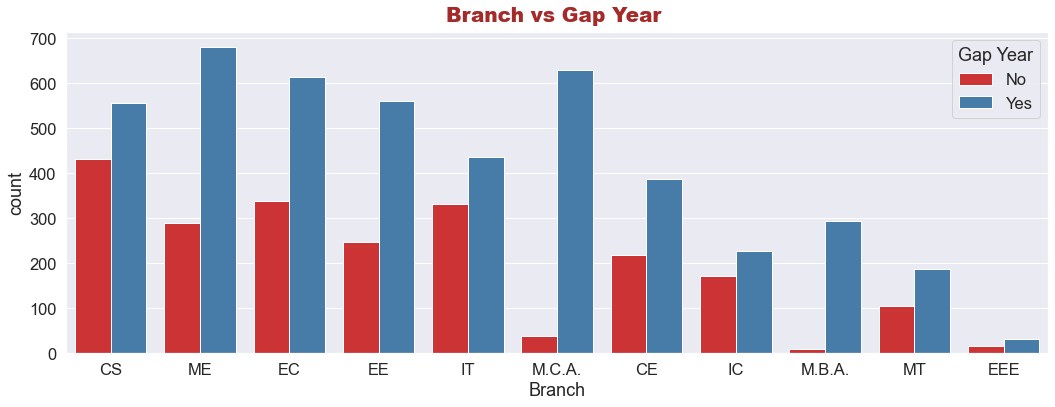

In [32]:
countplot("Branch")

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Inference</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

1. Most of the students are from **CS & ME** Branch and very very students from **EEE** Branch.
2. **M.C.A & M.B.A** Branch students are taking more gaps in years when compared with other Branches.
3. We can't make any inference for **EEE** Branch as the data-points are very low.
4. Since there are lots of Branches we can group them into new groups as follows:-
    * Group 1:- Civil Engineering (CE), Mechanical Engineering (ME), Metallurgical Engineering (MT)
    * Group 2:- Computer Science (CS), Information Technology (IT), Masters of Business Administration (M.B.A.), Masters of Computer Applications (M.C.A.)
    * Group 3:- Electronics and Communication (EC), Electrical Engineering (EE), Electrical and Electronics Engineering (EEE), Instrumentation and Control (IC)    

---

### 10. Visualizing "Admission Through" Feature.

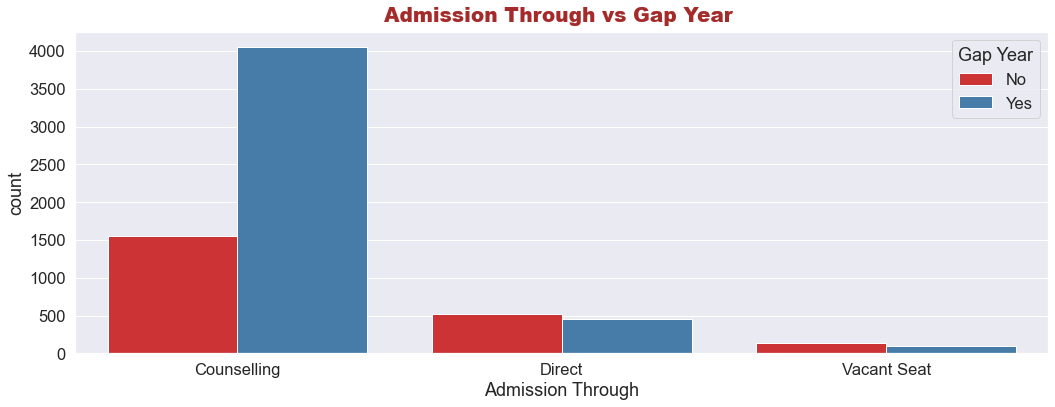

In [33]:
countplot("Admission Through")

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Inference</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

1. Most of the students got admitted through **Counselling** and very few got admitted through **vacant Seat**.
2. Those students who are getting **direcct admission** are not taking gaps in years.
3. Those students who are gettinf **admission through counselling** are taking gap years.

---

### 11. Visualizing "Course completed in stipulated time" Feature.

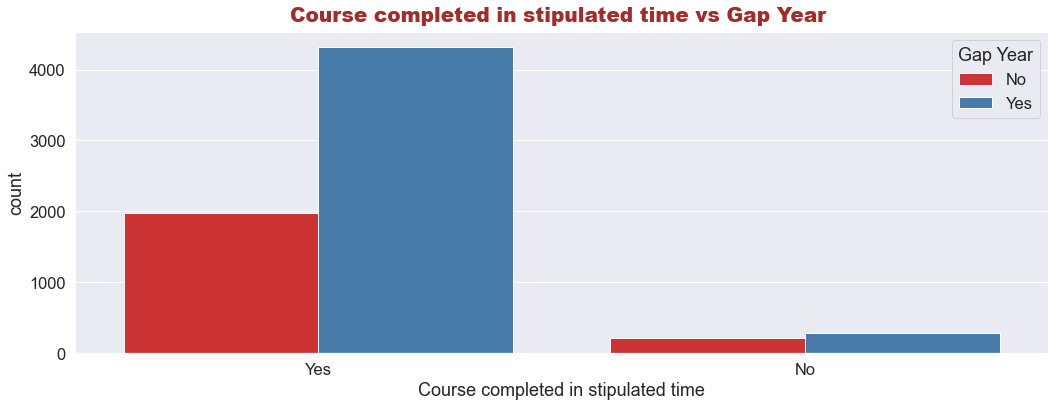

In [34]:
countplot("Course completed in stipulated time")

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Inference</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

1. Here the **Course completed in stipulated time** feature is showing whether the student has completed the course within time or not.
2. We can drop this feature because there is very high **class-imbalance.**

---

### 12. Visualizing "Year of Birth"  Feature.

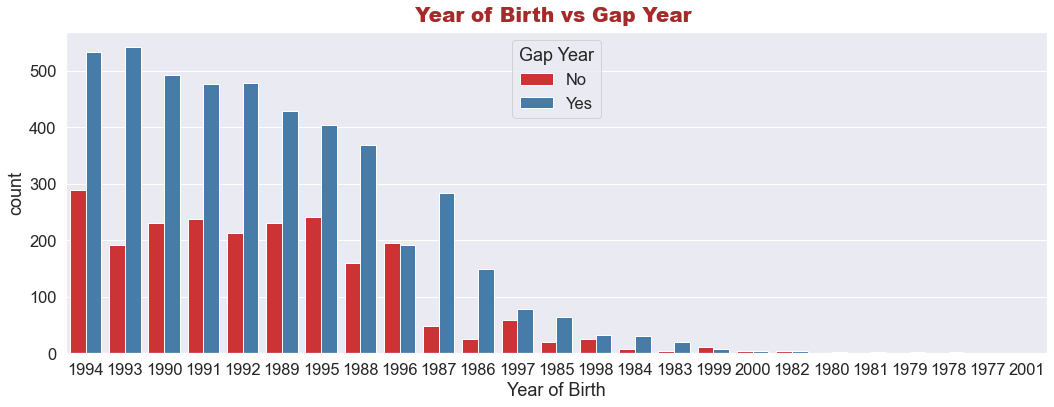

In [35]:
countplot("Year of Birth")

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Inference</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

1. Most of the students  were born in years of **1994, 1993, 1990,1991,1992, 1989,1995 or 1988.**
2. There are very few records students born in the **year of 1999, 2000 ,1982,1980,1981,1979,1978,1977,2001**.
3. **Note:-**
    * Since most of the years is having very less data-points due to which there will be chances more bias in our model.
    * So it's better to drop thise feature.

---

### 13. Visualizing "Month of Birth"  Feature.

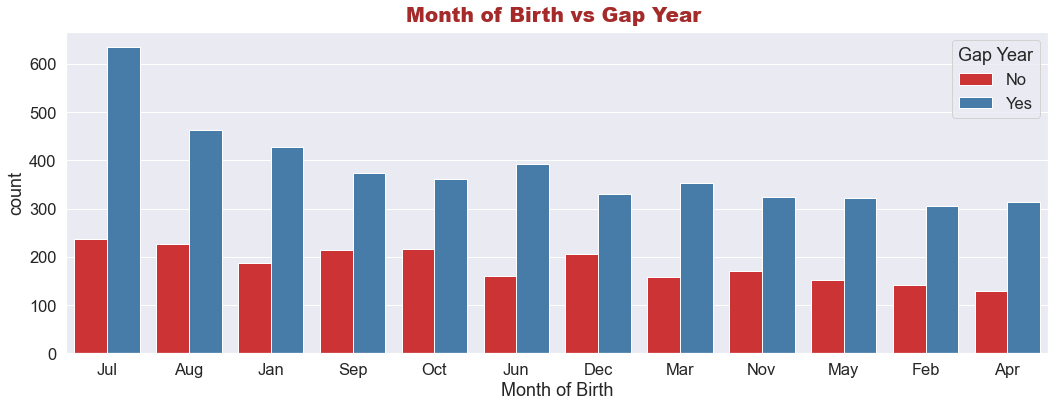

In [36]:
countplot("Month of Birth")

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Inference</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

1. Most of the students  were born in the month of **July and Auguest**.
2. We have students records for every **12 months**.
3. We can observe in months of **Jan, Feb, Mar, Apr, Nov & Dec** students taking more gaps is **more**
4. So we can create a new feature **Months_Season** in which divide the months into two groups **summer** and **winter.**

----

### 14. Visualizing "Age at the time of admission" Feature.

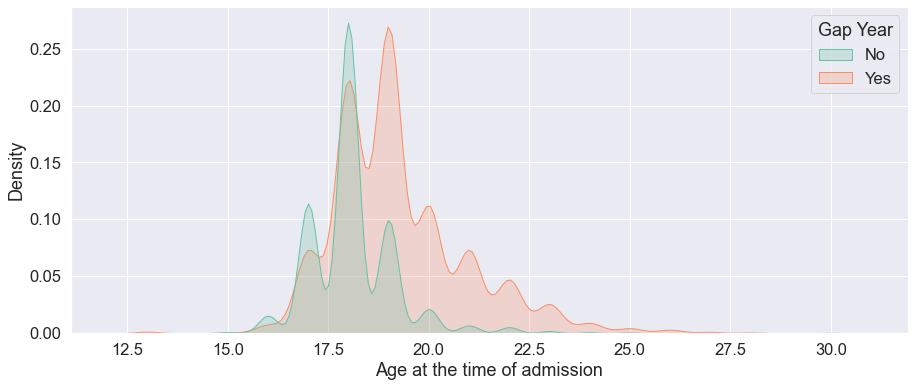

In [37]:
plt.figure(figsize=(15,6))
sns.kdeplot(df["Age at the time of admission"],hue=df["Gap Year"],fill=True,palette="Set2")
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Inference</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

1. We can clerly observe that most of the students records are having their **age between 17 to 19**.
2. We can also observe that our data is **skewed in both ways**.
3. We can make an inference that **students older than 18 are more likely to take gap in years.**
4. We can create a new feature **Age Category** by grouping the ages into different groups.
    * First group of **Below age 17**
    * Second group of **17 to 19**
    * Third group of **19+**

---

### 15. Visualizing "X Pass Year" & "XII Pass Year" Features.

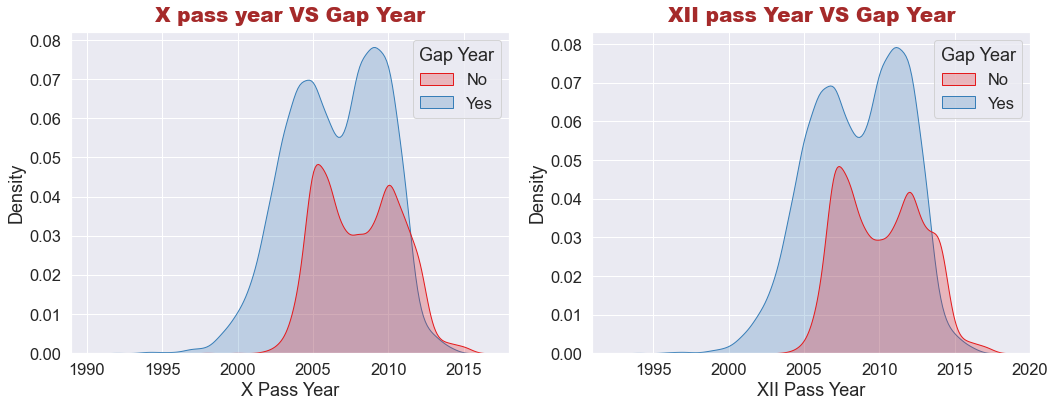

In [38]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.kdeplot(df["X Pass Year"],hue=df["Gap Year"],fill=True,palette="Set1")
plt.title("X pass year VS Gap Year",fontweight="black",size=20,pad=10,color="Brown")

plt.subplot(1,2,2)
sns.kdeplot(df["XII Pass Year"],hue=df["Gap Year"],fill=True,palette="Set1")
plt.title("XII pass Year VS Gap Year",fontweight="black",size=20,color="Brown",pad=10)
plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Inference</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

1. From first kdeplot we can make an inference that **students who have passed his/her 10th after 2002 than then there is a less chance of student taking gaps when compared with before years.**
2. From the secondplot we can make an inference that **students who have passed his/her 12th after 2005 than there is a less chnace of student taking gaps when compared with before years.**

---

### 16. Visualizing "Admission Status" Feature.

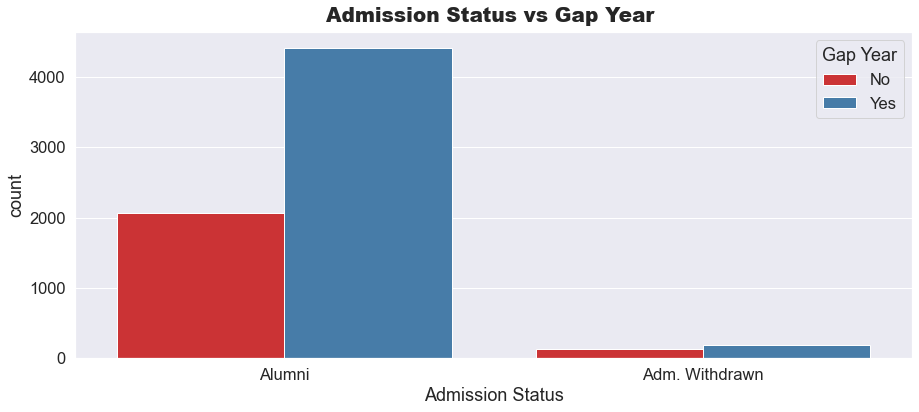

In [39]:
plt.figure(figsize=(15,6))
sns.countplot(df["Admission Status"],hue=df["Gap Year"],fill=True,palette="Set1")
plt.title("Admission Status vs Gap Year ",fontweight="black",size=20,pad=10)
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Inference</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

1. Most of the students has been admitted.
2. We can drop this feature because there is a very high class-imbalance.

---

### 17. Visualizing ""Year of Admission" & "Entrance test year" Features.

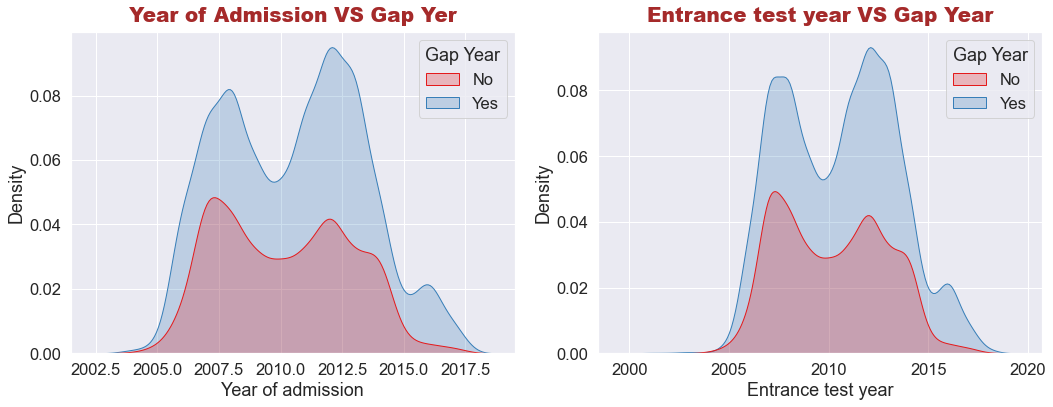

In [40]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.kdeplot(df["Year of admission"],hue=df["Gap Year"],palette="Set1",fill=True)
plt.title("Year of Admission VS Gap Yer",fontweight="black",pad=10,size=20,color="Brown")

plt.subplot(1,2,2)
sns.kdeplot(df["Entrance test year"],hue=df["Gap Year"],palette="Set1",fill=True)
plt.title("Entrance test year VS Gap Year",fontweight="black",pad=10,size=20,color="Brown")
plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Inference</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

1. We can clealry observe that both of the features are having **similar distributions.**
2. So we can **drop any one features from these two features.**
3. We can drop **Entrance test year feature** because before the admission the student has to give the entrance test.

---

### 18. Visualizing "Permanent State" Feature.

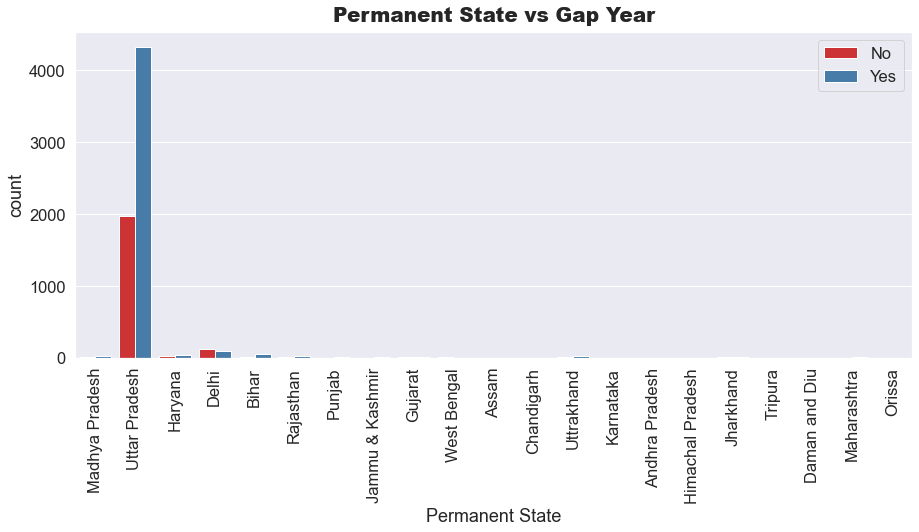

In [41]:
plt.figure(figsize=(15,6))
sns.countplot(df["Permanent State"],hue=df["Gap Year"],palette="Set1")
plt.title("Permanent State vs Gap Year",fontweight="black",size=20,pad=10)
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Inference</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

1. We can make an inference that more than 90% of students are from **Uttar Pradesh State.**
2. Other states are not having that much of data-points.
3. So we can **drop this feature** becuase it can lead to **more bais** in our model.

---

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">
    
<b>Analysis</b><br>

💡 Usefull Features are:- <b>"Year of admission","Gender", "Month of Birth","Age at the time of admission","Quota", "X % Score", "XII % Score", "Parent Annual Income (F)" ,"Branch", "Admission Through","Gap Year".</b><br>
    
💡 Unusefull Features are:- <b>"Category", "Year of Birth", "Admission Status","Permanent State", "Program", "Entrance test year", "Course completed in stipulated time".</b><br>
</div>

---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: purple; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> Feature Engineering

### 1. Creating New Feature from "Month of Birth".

In [42]:
df["Month of Birth"].head().to_frame()

,Month of Birth
0,Nov
1,Jun
2,Dec
3,Oct
4,Oct


In [43]:
month_season = []

for i in df["Month of Birth"]:
    if (i=="Dec") or (i=="Nov") or (i=="Jan") or (i=="Feb") or (i=="Mar") or (i=="Apr"):
        month_season.append("Winter Months")
    else:
        month_season.append("Summer Months")

In [44]:
df["Month Season of Birth"] = month_season

**Note**
* Since we have created the new feature we can drop the old feature.

In [45]:
df.drop(columns=["Month of Birth"],inplace=True)

---

### 2. Visualizing the new feature "Month Season of Birth".

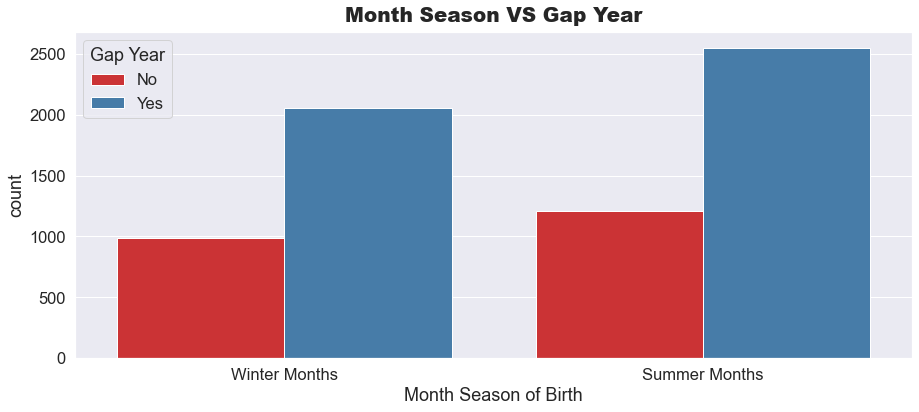

In [46]:
plt.figure(figsize=(15,6))
sns.countplot(df["Month Season of Birth"],hue=df["Gap Year"],palette="Set1")
plt.title("Month Season VS Gap Year",fontweight="black",size=20,pad=10)
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Inference</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

1. Most of the students records are having **summer season of birth.**  
2. From this new feature we can clearly make an inference that **students born in winter months** are more likely to **take gaps.**

---

### 3. Creating New Features from "Age at the time of admission" Feature.

In [47]:
df["Age at the time of admission"].head().to_frame()

,Age at the time of admission
0,19
1,19
2,19
3,19
4,19


In [48]:
age_bins = []

for i in df["Age at the time of admission"]:
    if (i<17):
        age_bins.append("Below 17")
    elif (i>=17) and (i<=19):
        age_bins.append("17 to 19")
    else:
        age_bins.append("Above 19")

In [49]:
df["Age Category at the time of admission"] = age_bins

#### **Note**
* Since we have created the required new feature we can drop the old feature.

In [50]:
df.drop(columns=["Age at the time of admission"],inplace=True)

---

### 4. Visualizing the New Age Category Feature.

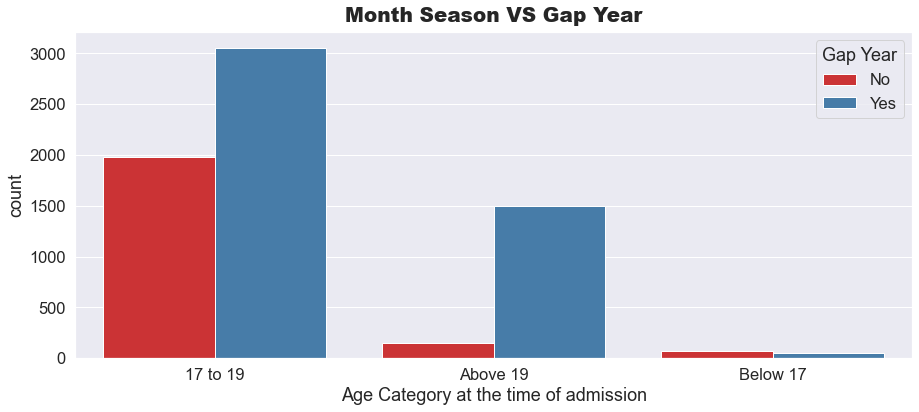

In [51]:
plt.figure(figsize=(15,6))
sns.countplot(df["Age Category at the time of admission"],hue=df["Gap Year"],palette="Set1")
plt.title("Month Season VS Gap Year",fontweight="black",size=20,pad=10)
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Inference</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

1. Most the students are between **17 to 19** ages.
2. Students **below 17** are very less but more likely of not taking **gaps**
3. Students **Above 19** are highly taking gaps.

---

### 5. Creating New Feature From "Branch" Feature.

In [52]:
df["Branch"].head().to_frame()

,Branch
0,CE
1,CE
2,CE
3,CE
4,CE


In [53]:
df["Branch"].unique().tolist()

['CE', 'CS', 'EC', 'EE', 'EEE', 'IC', 'IT', 'M.B.A.', 'M.C.A.', 'ME', 'MT']

In [54]:
branch_group = []

for i in df["Branch"]:
    if (i=="CE") or (i=="ME") or (i=="MT"):
        branch_group.append("Technical Engineering Group")
    
    elif (i=="CS") or (i=="IT") or (i=="M.B.A.") or (i=="M.C.A."):
        branch_group.append("Computer and Business Group")
        
    elif (i=="EC") or (i=="EE") or (i=="EEE") or (i=="IC"):
        branch_group.append("Electronics and Instrumentation Group")

In [55]:
df["Branch_Group"] = branch_group

**Note:-**
* Since we have created new feature we can drop the old feature.

In [56]:
df.drop(columns="Branch",inplace=True)

---

### 6. Visualizing new Feature Branch_Group.

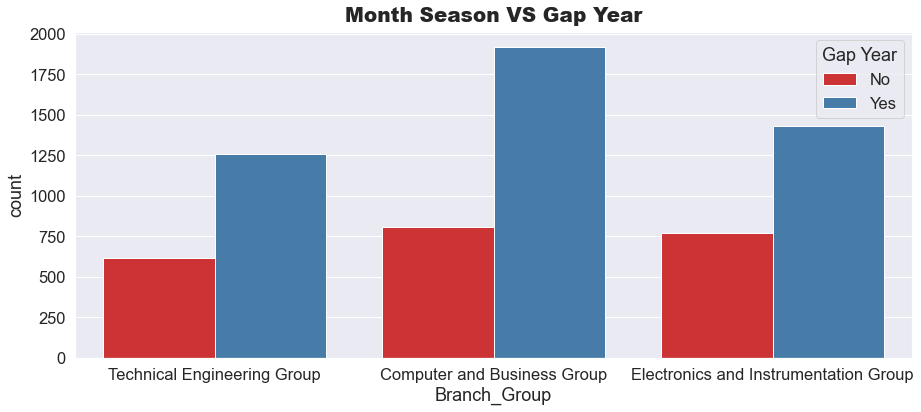

In [57]:
plt.figure(figsize=(15,6))
sns.countplot(df["Branch_Group"],hue=df["Gap Year"],palette="Set1")
plt.title("Month Season VS Gap Year",fontweight="black",size=20,pad=10)
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Inference</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

1. Most the students are from **Computer and Business Group.**
2. Almost every group is having **students taking gaps.**

---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: purple; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> Data Preprocessing

### 1. Dropping the Features which are Useless.

In [58]:
cols = ["Category","Year of Birth","Permanent State", "Admission Status", "Program", "Entrance test year", "Course completed in stipulated time"]

df.drop(columns=cols,inplace=True)

In [59]:
df.head()

,Year of admission,Gender,Quota,X % Score,XII % Score,Parent Annual Income (F),X Pass Year,XII Pass Year,Gap Year,Admission Through,Month Season of Birth,Age Category at the time of admission,Branch_Group
0,2007,Female,General,Very good,Very good,Low,2005,2007,No,Counselling,Winter Months,17 to 19,Technical Engineering Group
1,2007,Male,General,Average,Poor,Low,2005,2007,No,Direct,Summer Months,17 to 19,Technical Engineering Group
2,2007,Male,General,Poor,Average,Low,2005,2007,No,Direct,Winter Months,17 to 19,Technical Engineering Group
3,2007,Male,General,Poor,Average,Low,2005,2007,No,Counselling,Summer Months,17 to 19,Technical Engineering Group
4,2007,Female,General,Good,Good,Medium,2005,2007,No,Counselling,Summer Months,17 to 19,Technical Engineering Group


---

### 2. Feature Encoding.

* We will do **One Hot Encoding** for nominal categorical features.
* We will do **LabelEncoding** for ordinal categorical features.

In [60]:
nominal_cat_cols = ["Gender","Quota","Branch_Group","Admission Through","Month Season of Birth"]
ordinal_cat_cols = ["X % Score","XII % Score","Parent Annual Income (F)","Age Category at the time of admission"]

**One Hot Encoding**

In [61]:
df = pd.get_dummies(df,columns=nominal_cat_cols)

**Label Encoding**

In [62]:
encoder = LabelEncoder()

In [63]:
df[ordinal_cat_cols] = df[ordinal_cat_cols].apply(encoder.fit_transform)

**Encoding Target Feature**

In [64]:
df["Gap Year"].replace({"Yes":1,"No":0},inplace=True)

**Confirming Encoding done on all categorical features**

In [65]:
df.head()

,Year of admission,X % Score,XII % Score,Parent Annual Income (F),X Pass Year,XII Pass Year,Gap Year,Age Category at the time of admission,Gender_Female,Gender_Male,Quota_General,Quota_OBC,Quota_SC,Quota_ST,Branch_Group_Computer and Business Group,Branch_Group_Electronics and Instrumentation Group,Branch_Group_Technical Engineering Group,Admission Through_Counselling,Admission Through_Direct,Admission Through_Vacant Seat,Month Season of Birth_Summer Months,Month Season of Birth_Winter Months
0,2007,4,4,1,2005,2007,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1
1,2007,0,3,1,2005,2007,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0
2,2007,3,0,1,2005,2007,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1
3,2007,3,0,1,2005,2007,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0
4,2007,2,2,2,2005,2007,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0


---

### 3. Segregating Labels & Target Features.

In [66]:
X = df.drop(columns=["Gap Year"])
y = df["Gap Year"]

In [67]:
X.head()

,Year of admission,X % Score,XII % Score,Parent Annual Income (F),X Pass Year,XII Pass Year,Age Category at the time of admission,Gender_Female,Gender_Male,Quota_General,Quota_OBC,Quota_SC,Quota_ST,Branch_Group_Computer and Business Group,Branch_Group_Electronics and Instrumentation Group,Branch_Group_Technical Engineering Group,Admission Through_Counselling,Admission Through_Direct,Admission Through_Vacant Seat,Month Season of Birth_Summer Months,Month Season of Birth_Winter Months
0,2007,4,4,1,2005,2007,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1
1,2007,0,3,1,2005,2007,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0
2,2007,3,0,1,2005,2007,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1
3,2007,3,0,1,2005,2007,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0
4,2007,2,2,2,2005,2007,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0


In [68]:
y.head().to_frame()

,Gap Year
0,0
1,0
2,0
3,0
4,0


---

### 4. Using SMOTE to Deal with Class-Imbalance.

In [69]:
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

In [70]:
X.head()

,Year of admission,X % Score,XII % Score,Parent Annual Income (F),X Pass Year,XII Pass Year,Age Category at the time of admission,Gender_Female,Gender_Male,Quota_General,Quota_OBC,Quota_SC,Quota_ST,Branch_Group_Computer and Business Group,Branch_Group_Electronics and Instrumentation Group,Branch_Group_Technical Engineering Group,Admission Through_Counselling,Admission Through_Direct,Admission Through_Vacant Seat,Month Season of Birth_Summer Months,Month Season of Birth_Winter Months
0,2007,4,4,1,2005,2007,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1
1,2007,0,3,1,2005,2007,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0
2,2007,3,0,1,2005,2007,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1
3,2007,3,0,1,2005,2007,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0
4,2007,2,2,2,2005,2007,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0


In [71]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Gap Year, dtype: int64

---

### 5. Feature Scaling

In [72]:
scaler = StandardScaler()

In [73]:
X_scaled = scaler.fit_transform(X_resampled)

---

### 6. Splitting Data For Model Which Don't Need Scaled Data.

In [74]:
x_train,x_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=0)

In [75]:
print(x_train.shape, y_train.shape)

(7366, 21) (7366,)


In [76]:
print(x_test.shape,y_test.shape)

(1842, 21) (1842,)


---

### 7. Splitting Data For Model Which Need Scaled Data.

In [77]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_scaled,y_resampled,test_size=0.2,random_state=0)

In [78]:
print(x_train1.shape, y_train1.shape)

(7366, 21) (7366,)


In [79]:
print(x_test1.shape, y_test1.shape)

(1842, 21) (1842,)


---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: purple; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> Model Building For Scaled Data.

In [80]:
training_score = []
testing_score = []

In [81]:
from sklearn.metrics import f1_score

def model_prediction(model):
    model.fit(x_train1, y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    a = accuracy_score(y_train1, x_train_pred1) * 100
    b = accuracy_score(y_test1, x_test_pred1) * 100
    training_score.append(a)
    testing_score.append(b)
    
    f1_train = f1_score(y_train1, x_train_pred1, average='weighted')
    f1_test = f1_score(y_test1, x_test_pred1, average='weighted')
    
    print(f"Accuracy_Score of {model} model on Training Data is:", a)
    print(f"Accuracy_Score of {model} model on Testing Data is:", b)
    print("\n---------------------------------------------------------------------------------------")
    print(f"Classification report of {model} model is:")
    report = classification_report(y_test1, x_test_pred1)
    print(report)
    print("\n---------------------------------------------------------------------------------------")
    print(f"Comparision of f1 score of {model} on Training & Testing Data")
    
    ax =sns.barplot(['Train Data', 'Test Data'], [f1_train, f1_test],palette="Set1")
    plt.title('F1 Score',pad=30)
    plt.xlabel('Dataset')
    plt.ylabel('F1 Score')
    plt.ylim([0, 1])
    for i, v in enumerate([f1_train, f1_test]):
        ax.text(i, v+0.05, str(round(v, 2)), horizontalalignment='center', color='black', fontweight='bold',size=15)
    plt.show()
    
    print("\n---------------------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1, x_test_pred1)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt="g", cmap="viridis")
    plt.show()
    

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>1. Logistic-Regression </b> Model</h2>

Accuracy_Score of LogisticRegression() model on Training Data is: 99.95927233233776
Accuracy_Score of LogisticRegression() model on Testing Data is: 99.9457111834962

---------------------------------------------------------------------------------------
Classification report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       1.00      1.00      1.00       938

    accuracy                           1.00      1842
   macro avg       1.00      1.00      1.00      1842
weighted avg       1.00      1.00      1.00      1842


---------------------------------------------------------------------------------------
Comparision of f1 score of LogisticRegression() on Training & Testing Data


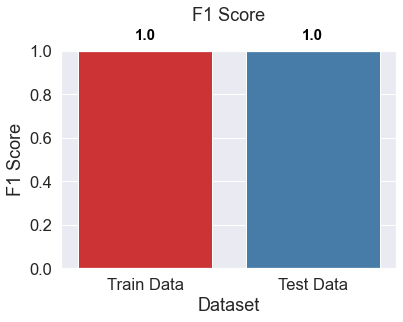


---------------------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


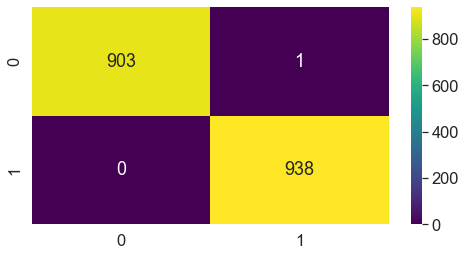

In [82]:
model_prediction(LogisticRegression())

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>2. KNeighborsClassifier </b> Model</h2>

Accuracy_Score of KNeighborsClassifier() model on Training Data is: 85.74531631821884
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 78.66449511400651

---------------------------------------------------------------------------------------
Classification report of KNeighborsClassifier() model is:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       904
           1       0.80      0.78      0.79       938

    accuracy                           0.79      1842
   macro avg       0.79      0.79      0.79      1842
weighted avg       0.79      0.79      0.79      1842


---------------------------------------------------------------------------------------
Comparision of f1 score of KNeighborsClassifier() on Training & Testing Data


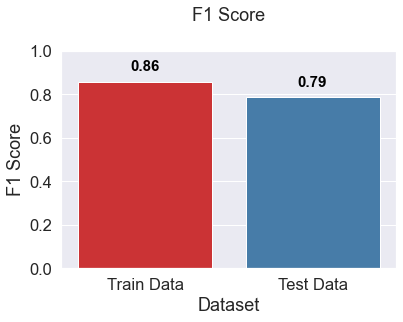


---------------------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


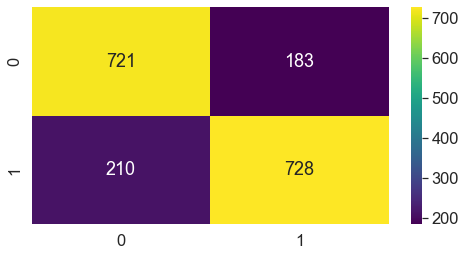

In [83]:
model_prediction(KNeighborsClassifier())

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>3. Support-Vector-Classifier </b> Model</h2>

Accuracy_Score of SVC() model on Training Data is: 99.09041542221016
Accuracy_Score of SVC() model on Testing Data is: 98.8599348534202

---------------------------------------------------------------------------------------
Classification report of SVC() model is:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.99      0.99      0.99       938

    accuracy                           0.99      1842
   macro avg       0.99      0.99      0.99      1842
weighted avg       0.99      0.99      0.99      1842


---------------------------------------------------------------------------------------
Comparision of f1 score of SVC() on Training & Testing Data


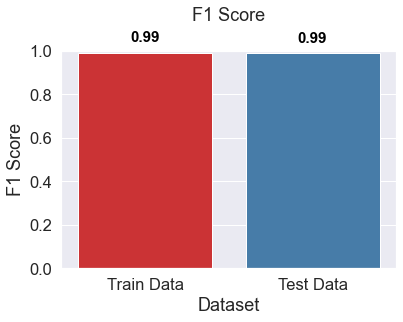


---------------------------------------------------------------------------------------
Confusion Matrix of SVC() model is:


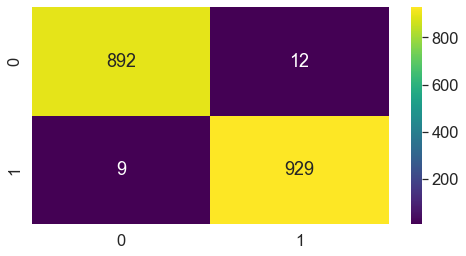

In [84]:
model_prediction(SVC())

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>4. Naive-Bayes </b> Model</h2>

Accuracy_Score of GaussianNB() model on Training Data is: 66.76622318761879
Accuracy_Score of GaussianNB() model on Testing Data is: 67.64386536373507

---------------------------------------------------------------------------------------
Classification report of GaussianNB() model is:
              precision    recall  f1-score   support

           0       0.69      0.62      0.65       904
           1       0.67      0.73      0.70       938

    accuracy                           0.68      1842
   macro avg       0.68      0.68      0.67      1842
weighted avg       0.68      0.68      0.68      1842


---------------------------------------------------------------------------------------
Comparision of f1 score of GaussianNB() on Training & Testing Data


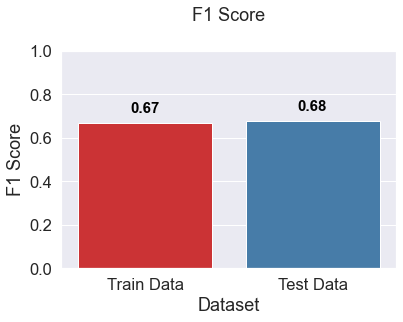


---------------------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


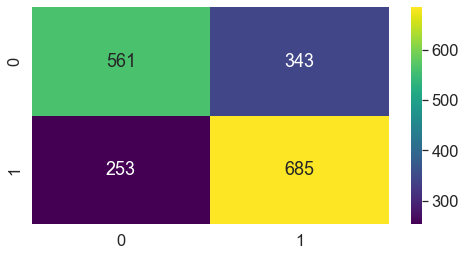

In [85]:
model_prediction(GaussianNB())

---

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: purple; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> Model Building For Un-Scaled Data.

In [86]:
from sklearn.metrics import f1_score

def model_prediction(model):
    model.fit(x_train, y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train, x_train_pred)*100
    b = accuracy_score(y_test, x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    f1_train = f1_score(y_train, x_train_pred, average='weighted')
    f1_test = f1_score(y_test, x_test_pred, average='weighted')
    
    print(f"Accuracy_Score of {model} model on Training Data is:", a)
    print(f"Accuracy_Score of {model} model on Testing Data is:", b)
    print("\n------------------------------------------------------------------------")
    print(f"Classification report of {model} model is:")
    report = classification_report(y_test, x_test_pred)
    print(report)
    print("\n------------------------------------------------------------------------")
    print(f"Comparision of f1 score of {model} on Training & Testing Data")
    
    ax = sns.barplot(['Train Data', 'Test Data'], [f1_train, f1_test],palette="Set1")
    plt.title('F1 Score',pad=30)
    plt.xlabel('Dataset')
    plt.ylabel('F1 Score')
    plt.ylim([0, 1])
    for i, v in enumerate([f1_train, f1_test]):
        ax.text(i, v+0.05, str(round(v, 2)), horizontalalignment='center', color='black', fontweight='bold',size=15)
    plt.show()
    
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test, x_test_pred)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt="g", cmap="viridis")
    plt.show()


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>5. Decision-Tree-Classifier </b> Model</h2>

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 99.2942453854506

------------------------------------------------------------------------
Classification report of DecisionTreeClassifier() model is:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.99      0.99      0.99       938

    accuracy                           0.99      1842
   macro avg       0.99      0.99      0.99      1842
weighted avg       0.99      0.99      0.99      1842


------------------------------------------------------------------------
Comparision of f1 score of DecisionTreeClassifier() on Training & Testing Data


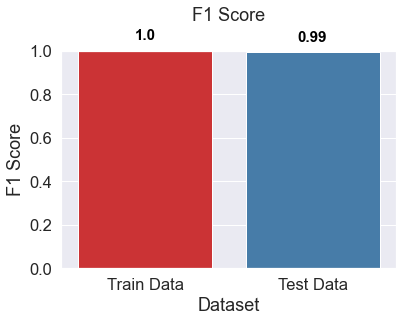


------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


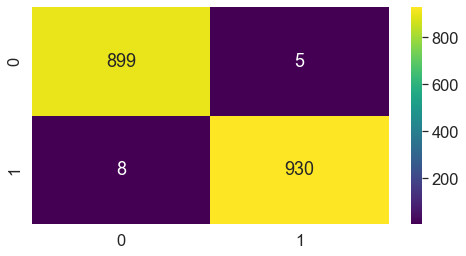

In [87]:
model_prediction(DecisionTreeClassifier())

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>6. Random-Forest-Classifier </b> Model</h2>

Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 96.79695982627578

------------------------------------------------------------------------
Classification report of RandomForestClassifier() model is:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       904
           1       0.98      0.96      0.97       938

    accuracy                           0.97      1842
   macro avg       0.97      0.97      0.97      1842
weighted avg       0.97      0.97      0.97      1842


------------------------------------------------------------------------
Comparision of f1 score of RandomForestClassifier() on Training & Testing Data


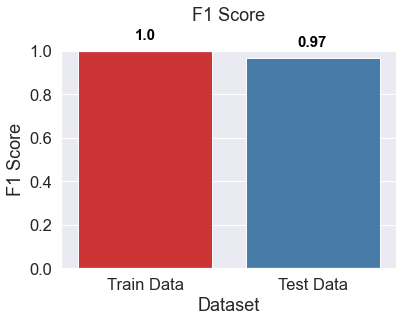


------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


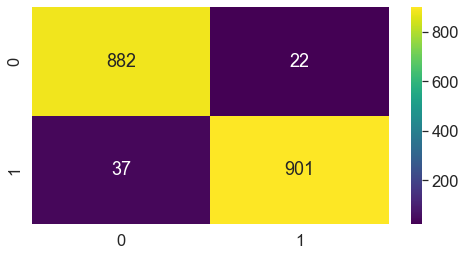

In [88]:
model_prediction(RandomForestClassifier())

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>7. Ada-Boost-Classifier </b> Model</h2>

Accuracy_Score of AdaBoostClassifier() model on Training Data is: 94.84116209611729
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 95.11400651465797

------------------------------------------------------------------------
Classification report of AdaBoostClassifier() model is:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       904
           1       0.97      0.93      0.95       938

    accuracy                           0.95      1842
   macro avg       0.95      0.95      0.95      1842
weighted avg       0.95      0.95      0.95      1842


------------------------------------------------------------------------
Comparision of f1 score of AdaBoostClassifier() on Training & Testing Data


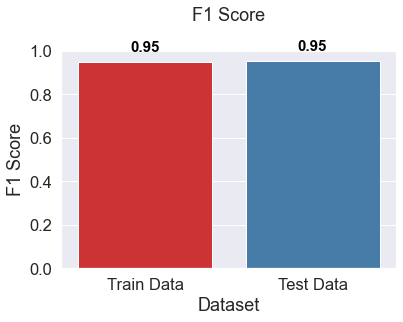


------------------------------------------------------------------------
Confusion Matrix of AdaBoostClassifier() model is:


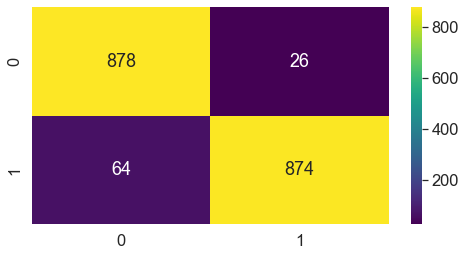

In [89]:
model_prediction(AdaBoostClassifier())

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>8. Gradient-Boosting-Classifier </b> Model</h2>

Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 99.98642411077925
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 99.9457111834962

------------------------------------------------------------------------
Classification report of GradientBoostingClassifier() model is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       1.00      1.00      1.00       938

    accuracy                           1.00      1842
   macro avg       1.00      1.00      1.00      1842
weighted avg       1.00      1.00      1.00      1842


------------------------------------------------------------------------
Comparision of f1 score of GradientBoostingClassifier() on Training & Testing Data


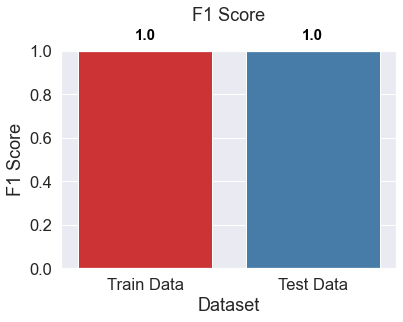


------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


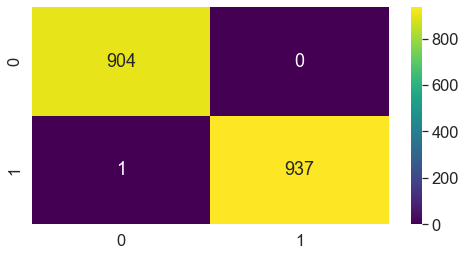

In [90]:
model_prediction(GradientBoostingClassifier())

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>9. LGMB Classifier </b> Model</h2>

Accuracy_Score of LGBMClassifier() model on Training Data is: 100.0
Accuracy_Score of LGBMClassifier() model on Testing Data is: 100.0

------------------------------------------------------------------------
Classification report of LGBMClassifier() model is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       1.00      1.00      1.00       938

    accuracy                           1.00      1842
   macro avg       1.00      1.00      1.00      1842
weighted avg       1.00      1.00      1.00      1842


------------------------------------------------------------------------
Comparision of f1 score of LGBMClassifier() on Training & Testing Data


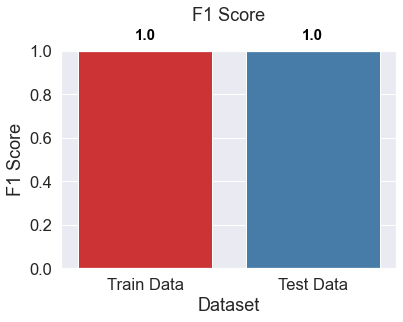


------------------------------------------------------------------------
Confusion Matrix of LGBMClassifier() model is:


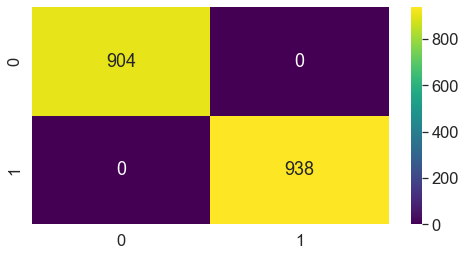

In [91]:
model_prediction(LGBMClassifier())

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>10. XGBClassifier </b> Model</h2>

Accuracy_Score of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...) model on Training Data is: 100.0
Accuracy_Score of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
          

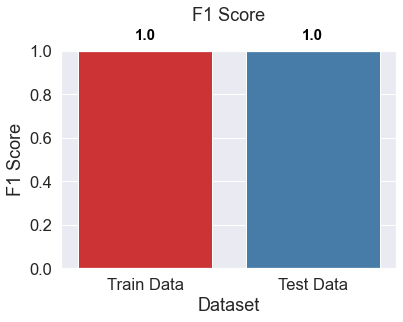


------------------------------------------------------------------------
Confusion Matrix of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...) model is:


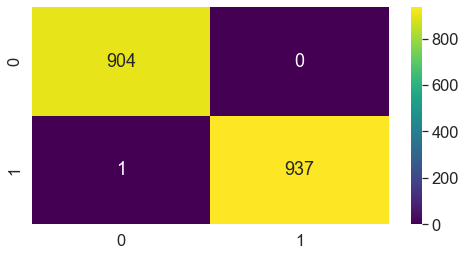

In [92]:
model_prediction(XGBClassifier())

---

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>11. Cat-Boost-Classifier </b> Model</h2>

Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x00000199B9F242B0> model on Training Data is: 100.0
Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x00000199B9F242B0> model on Testing Data is: 100.0

------------------------------------------------------------------------
Classification report of <catboost.core.CatBoostClassifier object at 0x00000199B9F242B0> model is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       1.00      1.00      1.00       938

    accuracy                           1.00      1842
   macro avg       1.00      1.00      1.00      1842
weighted avg       1.00      1.00      1.00      1842


------------------------------------------------------------------------
Comparision of f1 score of <catboost.core.CatBoostClassifier object at 0x00000199B9F242B0> on Training & Testing Data


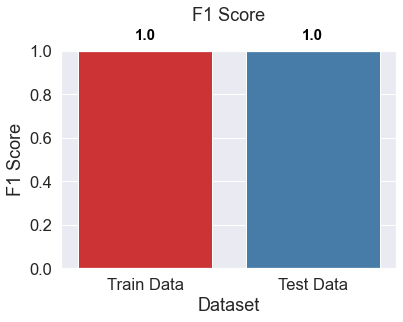


------------------------------------------------------------------------
Confusion Matrix of <catboost.core.CatBoostClassifier object at 0x00000199B9F242B0> model is:


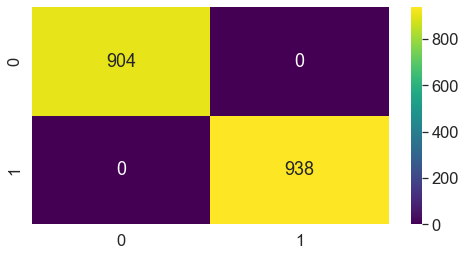

In [93]:
model_prediction(CatBoostClassifier(verbose=False))

***

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: purple; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> All Models Performance Comparison

In [94]:
models = ["Logistic Regression","KNN","SVM","Naive Bayes","Decision Tree","Random Forest","Ada Boost",
          "Gradient Boost","LGBM","XGBoost","CatBoost"]

In [95]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

In [96]:
df

,Algorithms,Training Score,Testing Score
0,Logistic Regression,99.959272,99.945711
1,KNN,85.745316,78.664495
2,SVM,99.090415,98.859935
3,Naive Bayes,66.766223,67.643865
4,Decision Tree,100.000000,99.294245
5,Random Forest,100.000000,96.796960
6,Ada Boost,94.841162,95.114007
7,Gradient Boost,99.986424,99.945711
8,LGBM,100.000000,100.000000
9,XGBoost,100.000000,99.945711


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Inference</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

1. The best accuracy was given by **Logistic Regression, CatBoost, LGBM** with **100%** accuracy.
2. The accuracy given by **XGBoost, GradientBoost, Decision Tree, SVM** was also good.
3. So we can use any of these model for prediction whether the student will get admission or not.

### Plotting above results using column-bar chart.

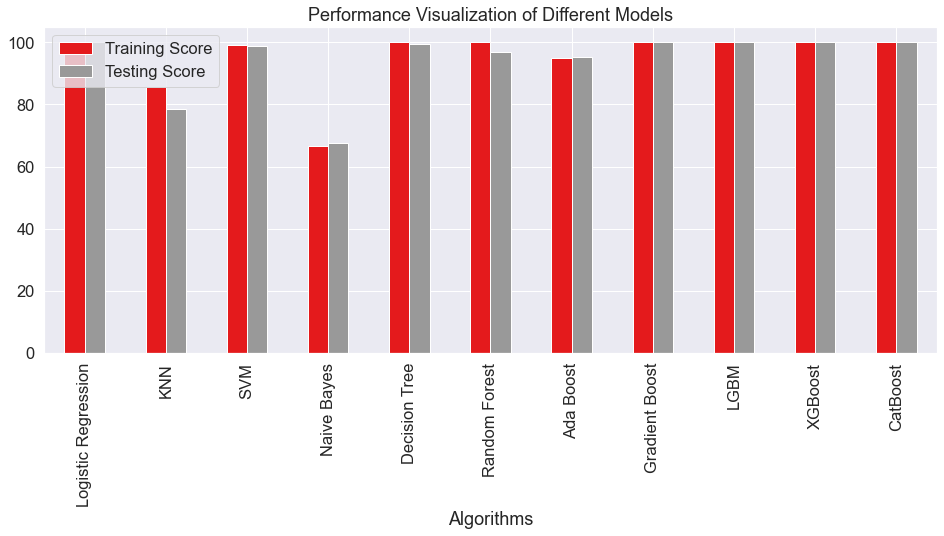

In [97]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

---